### Algorithmic Trading in Python - MACD: Construction and Backtest
 https://www.youtube.com/watch?v=JzdVPnCSSuo

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df =  yf.download('^NSEI',start="2010-01-01",end = None)

[*********************100%%**********************]  1 of 1 completed


In [63]:
def MACD(df):
    df['EMA12']= df.Close.ewm(span=12).mean()
    df['EMA26']= df.Close.ewm(span=26).mean()
    df['MACD'] = df.EMA12 - df.EMA26
    df['Signal'] = df.MACD.ewm(span=9).mean()
    print('indicators added')
MACD(df)


indicators added


In [64]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,Signal
Date,,,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,5232.200195,5232.200195,0.000000,0.000000
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,5256.954203,5255.928889,1.025314,0.569619
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,5266.651447,5265.224058,1.427389,0.921164
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,5265.530425,5264.630292,0.900133,0.914040
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,5259.884458,5260.019970,-0.135512,0.601822
...,...,...,...,...,...,...,...,...,...,...
2024-06-12,23344.449219,23441.949219,23295.949219,23322.949219,23322.949219,295600,22949.077014,22746.583036,202.493978,136.856822
2024-06-13,23480.949219,23481.050781,23353.900391,23398.900391,23398.900391,268300,23018.280610,22794.902840,223.377770,154.161012
2024-06-14,23464.949219,23490.400391,23334.250000,23465.599609,23465.599609,223100,23087.098918,22844.584082,242.514836,171.831777


In [65]:
len(df)

3547

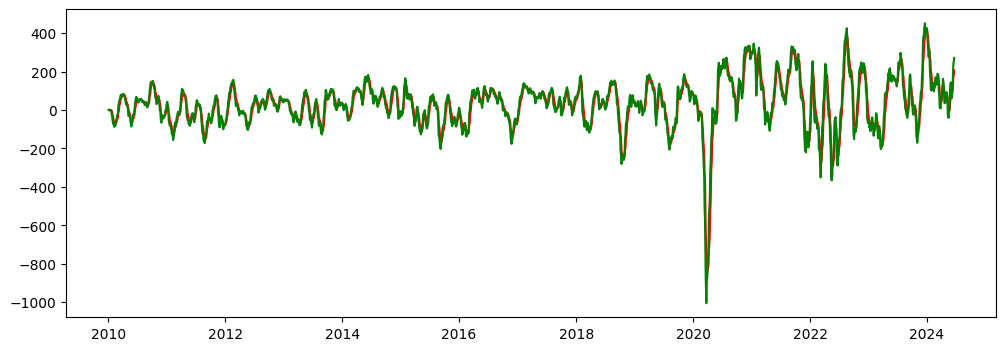

In [66]:
plt.figure(figsize=(12,4))
plt.plot(df.Signal,color='red')
plt.plot(df.MACD,color='green')
plt.show()

### Strategy to check if MACD crossover with signal line

In [67]:
Buy, Sell =[] ,[]

for i in range(2, len(df)):
    if df.MACD.iloc[i]>df.Signal.iloc[i] and df.MACD.iloc[i-1]<df.Signal.iloc[i-1]:
        Buy.append(i)
    elif df.MACD.iloc[i]<df.Signal.iloc[i] and df.MACD.iloc[i-1]>df.Signal.iloc[i-1]:
        Sell.append(i)

In [68]:
df.iloc[Buy].index

DatetimeIndex(['2010-01-15', '2010-02-16', '2010-05-31', '2010-07-12',
               '2010-08-19', '2010-09-06', '2010-11-04', '2010-12-03',
               '2010-12-14', '2011-02-15',
               ...
               '2023-09-04', '2023-10-12', '2023-11-07', '2024-02-07',
               '2024-02-16', '2024-03-04', '2024-04-01', '2024-04-29',
               '2024-05-21', '2024-06-07'],
              dtype='datetime64[ns]', name='Date', length=138, freq=None)

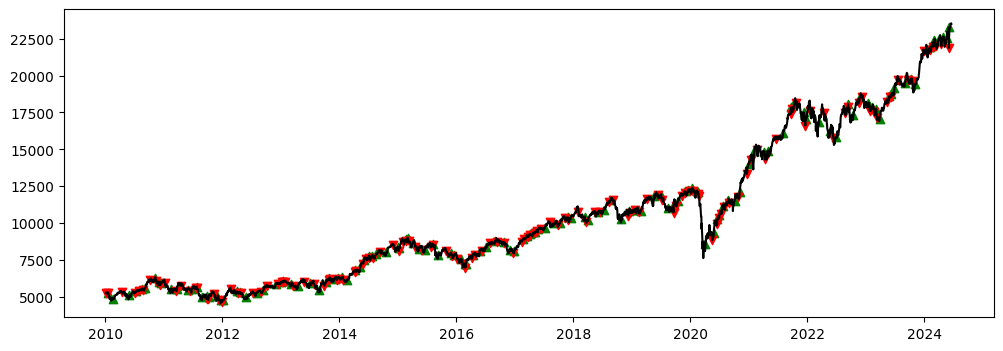

In [69]:
plt.figure(figsize=(12,4))
plt.scatter(df.iloc[Buy].index,df.iloc[Buy].Close,marker="^",color='green')
plt.scatter(df.iloc[Sell].index,df.iloc[Sell].Close,marker="v",color='red')
plt.plot(df.Close,label ='Market Price',color='k')

### BACKTESTING THE STRATEGY

In [70]:
Realbuys = [i+1 for i in Buy]
Realsells = [i+1 for i in Sell]
Buyprices = df.Open.iloc[Realbuys]
Sellprices = df.Open.iloc[Realsells]

In [71]:
Buyprices[0]

5253.64990234375

In [72]:
Sellprices[0]

5264.25

In [73]:
# Eliminate instance if there is a sell without a buy in the beginning & if the last buy is without a sell

if Sellprices.index[0]<Buyprices.index[0]:
    Sellprices = Sellprices.drop(Sellprices.index[0])
elif Buyprices.index[-1]>Sellprices.index[-1]:
    Buyprices = Buyprices.drop(Buyprices.index[-1])

In [74]:
profitsrel = []

for i in range(len(Sellprices)):
    profitsrel.append((Sellprices[i]-Buyprices[i])/Buyprices[i])

profitsrel

[-0.005243936158595099,
 0.09924571743271579,
 0.0296387318751536,
 0.0051487656582867875,
 -0.014203672719716436,
 0.09506094123855253,
 -0.040306238531431275,
 -0.045188220522679005,
 -0.005032767363450796,
 -0.014037237294091749,
 0.038932749812161965,
 -0.026712547073806988,
 0.0037845679069380667,
 -0.017561969815139057,
 -0.04005047363225726,
 -0.0333957707894664,
 0.03933349253046104,
 -0.06014095152263477,
 -0.01690433272851699,
 0.1474779166749326,
 -0.013990373932186849,
 -0.018494136100755933,
 0.0453514730380783,
 0.01405035003231494,
 0.04341141053732317,
 0.0064427857532984925,
 7.480218841477351e-05,
 -0.00789386675483551,
 -0.005833493747629541,
 -0.030210839011545088,
 0.05291098563335262,
 -0.0026420532983603773,
 0.050335312742347524,
 0.01774689487109596,
 -0.0013227195320253367,
 -0.004198703257847443,
 -0.01204929615031035,
 -0.033037128809120755,
 0.0962076653163395,
 -0.011142032891670397,
 0.02599573512535311,
 0.00047195435584657314,
 -0.018308789884738285,
 -

In [75]:
sum(profitsrel)/len(profitsrel)

0.006369904721142062